In [37]:
from grid import *
from grid import Neuron
import grid
%matplotlib inline

## Creating the VCO matrix
The VCO matrix is a 6 x 12 grid of 12 cell VCO objects.

In [38]:
N = 12
numrow = 6; numcol = 12;

rhos = 0.14 * (np.sqrt(3) ** np.arange(numrow))
thetas = np.pi + 2.0*np.pi*(np.arange(numcol))/numcol


VCOmatrix = [[vco.VCO_model(N, rhos[i], thetas[j]) for j in range(numcol)] for i in range(numrow)]

## Weight matrixes
Creating the weight matrixes for input to different neurons from the VCO matrix

In [39]:
# border cell (Fig. 7)
weights_border = np.full([6,12],np.nan)
weights_border[:,9] = [2,3,5,7,11,9]

# large grid (Fig. 7)
weights_lgrid = np.full([6,12],np.nan)
weights_lgrid[3,0] = 9
weights_lgrid[3,4] = 9
weights_lgrid[3,8] = 3

# small grid (Fig. 7)
weights_sgrid = np.full([6,12],np.nan)
weights_sgrid[3,1] = 1
weights_sgrid[3,5] = 9
weights_sgrid[3,9] = 3

# place cell (Fig. 7)
weights_place = np.full([6,12],np.nan)
rot_place = 8*np.pi/6. #orientation of the tuning function is zero by default
weights_place[2,:] = [11,11,0,0,0,0,0,0,11,10,10,10]
weights_place[3,:] = [10,11,0,0,0,0,0,0,10,10,10,10]
weights_place[4,:] = [10,11,0,1,2,1,0,0,10, 9, 8, 9]

# curved border (Fig. 9)
weights_cborder = np.full([6,12],np.nan)
for col in [0,1,2,3,4,11]:
    weights_cborder[:,col] = [1,1,2,4,7,1]
    
#lumpy border (supplemental)
weights_lborder = np.full([6,12],np.nan)
weights_lborder[:,0] = [1,2,3,5,8,3]
weights_lborder[2,2] = 6
weights_lborder[3,2] = 1

# multi-field dentate place cell in square box (supplemental)
weights_dplace = np.full([6,12],np.nan)
weights_dplace[2,:] = [8,0,1,1,7,4,2,7,8,8,4,2]
weights_dplace[3,:] = [3,0,3,0,5,0,1,4,5,9,9,11]
weights_dplace[4,:] = [0,2,2,10,7,0,0,5,6,2,6,4]

## Creating Neurons
Each of the different types of neurons are initiated by creating Neuron object with the parameters (neuron_type, input_matrix, weight_type, weight_matrix). The weight matrix can be a list or of a list of lists of type [[row, column, phase, weight]]. weight_type can also be 'auto' in which case the weight_matrix need not be input.

In [40]:
border_cell = Neuron('border', VCOmatrix, 'hand', weights_border)
lgrid_cell = Neuron('lgrid', VCOmatrix, 'hand', weights_lgrid)
sgrid_cell = Neuron('sgrid', VCOmatrix, 'hand', weights_sgrid)
place_cell = Neuron('place', VCOmatrix, 'hand', weights_place)
cborder_cell = Neuron('cborder', VCOmatrix, 'hand', weights_cborder)
lborder_cell = Neuron('lborder', VCOmatrix, 'hand', weights_lborder)
dplace_cell = Neuron('dplace', VCOmatrix, 'hand', weights_dplace)

#### To view inputs to a neuron in the form [[row, column, phase, weight]], use the function .get_inputs()

In [41]:
border_cell.get_inputs()

[VCO [N=12, (rho, theta)=(0.14, 7.853982), phi_n=0],
 VCO [N=12, (rho, theta)=(0.24248711305964282, 7.853982), phi_n=0],
 VCO [N=12, (rho, theta)=(0.42, 7.853982), phi_n=0],
 VCO [N=12, (rho, theta)=(0.7274613391789284, 7.853982), phi_n=0],
 VCO [N=12, (rho, theta)=(1.2599999999999998, 7.853982), phi_n=0],
 VCO [N=12, (rho, theta)=(2.182384017536785, 7.853982), phi_n=0]]

#### Printing out the cell shows information in the form [cell_type, input_type, number_of_inputs]

In [42]:
lgrid_cell

Neuron [lgridcell, input type = <class 'vco.VCO_model'>, number of inputs =3]

In [43]:
sgrid_cell

Neuron [sgridcell, input type = <class 'vco.VCO_model'>, number of inputs =3]

In [44]:
grid_matrix = grid.auto_weights(0,6,VCOmatrix)

In [45]:
grid_matrix

[Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_model'>, number of inputs =3],
 Neuron [gridcell, input type = <class 'vco.VCO_mode

#### The function .show_plot(size, figure_number) displays the plot and the normalized plot for a neuron

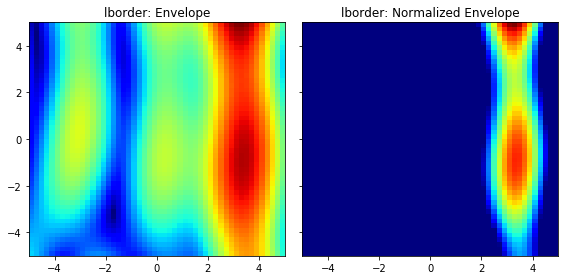

In [46]:
lborder_cell.show_plot(5,2)

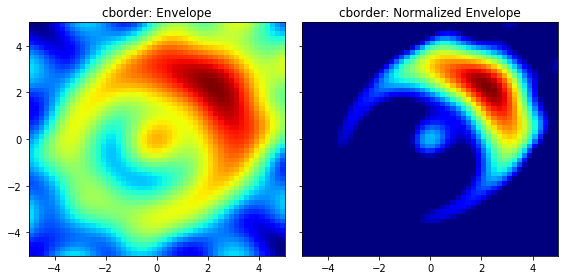

In [47]:
cborder_cell.show_plot(5,1)

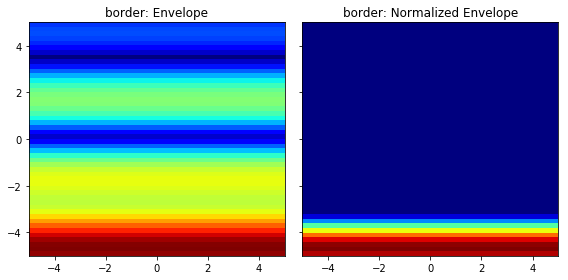

In [51]:
border_cell.show_plot(5,2)

#### Weights is a private variable of a Neuron that can be printed to show the VCO input

In [48]:
border_cell.weights

[(0, 9, 2.0, 1),
 (1, 9, 3.0, 1),
 (2, 9, 5.0, 1),
 (3, 9, 7.0, 1),
 (4, 9, 11.0, 1),
 (5, 9, 9.0, 1)]

### Changing the weights matrix of a Neuron to change the phase variable in [row, column, phase, weight] for all the input VCO's to 1 (Calculating the envelope using input from only the first cell in all the input VCO's)

In [52]:
border_cell.weights
new_weights = []

In [53]:
for weight in border_cell.weights:
    x,y,z,w = weight
    new_weights.append((x,y,1,w))
new_weights

[(0, 9, 1, 1),
 (1, 9, 1, 1),
 (2, 9, 1, 1),
 (3, 9, 1, 1),
 (4, 9, 1, 1),
 (5, 9, 1, 1)]

In [54]:
new_border_cell = Neuron('border', VCOmatrix, 'hand', new_weights)

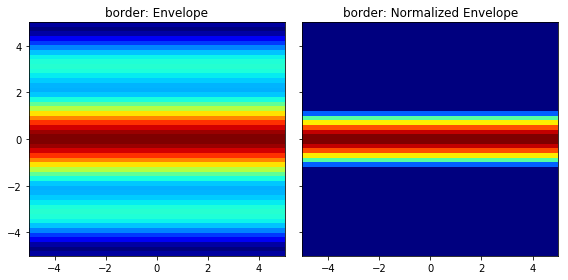

In [55]:
new_border_cell.show_plot(5, 1)